## <center>SVM & Neural Networks</center>

<b><center>Alicia Amores Sánchez </center></b>

Primero importo los paquetes que voy a utilizar durante la actividad:

In [25]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
import missingno
from ray import tune
from sklearn.model_selection import GridSearchCV, train_test_split


A continuación importo el dataset con los datos

In [19]:
mobileData = pd.read_csv('datasets_train.csv')
mobileData.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## 1. Análisis descriptivo de los datos:

<b> Análisis de las variables numéricas </b>

Se hace un análisis de las variables numéricas ara ver la media, el máximo, el mínimo, la mediana y los cuartiles

In [4]:
# De las variables numéricas hallar datos estadísticos: máximo, mínimo, media, mediana y cuartiles
stats_df = mobileData.describe()
# Obtener y añadir la mediana
median = pd.DataFrame(mobileData.median())
median = median.transpose()
median.rename(index = {0:'median'},inplace = True)
stats_df = stats_df.append(median).transpose() # Hay q igualarlo porq append() devuelve nuevo df
stats_df

,count,mean,std,min,25%,50%,75%,max,median
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0,1226.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0,0.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0,1.5
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0,3.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0,32.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0,0.5
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0,141.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0,4.0


<b> Matriz de correlaciones con las columnas numéricas <b>

In [7]:
corr_mat = mobileData.corr()
corr_mat

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


Las columnas con mayor correlación con el *range_price* son las siguientes:

In [8]:
#Encontrar las correlaciones más altas, que superen el 0.75
print('\033[1m'+'Listado de las variables con mayor influencia en el rango de precios junto a su coeficiente de correlación:'+'\033[0m')
important_var_list = []
for i in range(0,len(corr_mat)):
    if corr_mat['price_range'][i] > 0.75:
        print('{} {}'.format(corr_mat.index[i],corr_mat.loc[corr_mat.index[i],'price_range']))
        important_var_list.append(corr_mat.index[i])

Listado de las variables con mayor influencia en el rango de precios junto a su coeficiente de correlación:
ram 0.9170457362649902
price_range 1.0


<b> Análisis de las variables categóricas </b>

In [9]:
#De las variables categóricas, listar las diferentes categorías y hallar la frecuencia de cada una de ellas. 
var_cat = mobileData.select_dtypes(include = 'object')
# Imprimir la frecuencia (en %) para cada categoria dentro de cada variable categórica
for col_name in var_cat.columns:
    print('Variable: ' + col_name)
    print(100*var_cat[col_name].value_counts()/len(var_cat[col_name]))
    print('-------------------------------')

Como podemos observar, al no imprimirse nada, no hay variables categóricas en el dataset. 
Se podrían pasar algunas columnas numéricas a categóricas, pero no lo considero conveniente ya que para realizar la clasificación necesitamos que las variables sean numéricas, por lo que voy a dejar el dataset tal y como está. 

<b> Tratamiento de missing </b>

A continuación veo si faltan datos en alguna columna. En caso de que sea así aplicaré un tratamiento de missing según vea conveniente.

In [10]:
#Identificar variables con valores faltantes
# Lista con los missing de cada columna
missing = mobileData.isna().sum()
# Creamos dataframe con columnas y missing values
missing_df = pd.DataFrame([mobileData.columns,missing]).transpose()
# Nos quedamos solo con  las columnas que tengan missing
for index in missing_df.index:
    if missing_df.iloc[index,1] > 0:
        print('Columna: {}, N of NaN: {}, Index in Dataframe: {}'.format(missing_df.iloc[index,0],missing_df.iloc[index,1],index))


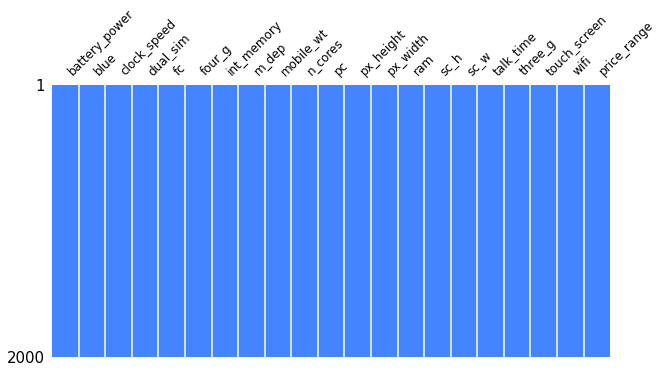

In [11]:
#Para verlo gráficamente
missingno.matrix(mobileData,sparkline=False, figsize=(10,5), fontsize=12, color=(0.27, 0.52, 1.0));

Como se puede observar no hay valores que falten en el dataset, por lo que no es necesario aplicar un tratamiento de missing a los datos. 

## 2. Aplicar SVM

Primero se separan los datos en entrenamiento y test

In [20]:
cols = list(mobileData.columns[1:len(mobileData.columns)-1])
X = mobileData[cols].values
# Variable a predecir: price_range
Y = mobileData['price_range']
# Division of dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

A continuación, se hace un análisi para ver qué hiperparámetros son mejores en el modelo de SVM. De esta forma se optimizará el modelo.

In [13]:
#https://docs.ray.io/en/master/tune/index.html#:~:text=Tune%20is%20a%20Python%20library%20for%20experiment,execution%20and%20hyperparameter%20tuning%20at%20any%20scale.

#Aplicar algoritmo de optimización al modelo e imprimir el mejor modelo

def objective(step, alpha, beta):
    return (0.1 + alpha * step / 100)**(-1) + beta * 0.1


def training_function(config):
    # Hyperparameters
    alpha, beta = config["alpha"], config["beta"]
    for step in range(10):
        # Iterative training function - can be any arbitrary training procedure.
        intermediate_score = objective(step, alpha, beta)
        # Feed the score back back to Tune.
        tune.report(mean_loss=intermediate_score)


analysis = tune.run(
    training_function,
    config={
        "alpha": tune.grid_search([0.001, 0.01, 0.1]),
        "beta": tune.choice([1, 2, 3])
    })

print("Best config: ", analysis.get_best_config(
    metric="mean_loss", mode="min"))

# Get a dataframe for analyzing trial results.
df = analysis.results_df

2021-02-11 21:12:51,103	INFO services.py:1171 -- View the Ray dashboard at http://127.0.0.1:8265
2021-02-11 21:13:02,092	WARNING function_runner.py:539 -- Function checkpointing is disabled. This may result in unexpected behavior when using checkpointing features or certain schedulers. To enable, set the train function arguments to be `func(config, checkpoint_dir=None)`.
2021-02-11 21:13:02,576	ERROR syncer.py:72 -- Log sync requires rsync to be installed.


Trial name,status,loc,alpha,beta
training_function_8aeec_00000,RUNNING,,0.001,3


Result for training_function_8aeec_00000:
  date: 2021-02-11_21-13-05
  done: false
  experiment_id: bfabf5e8409f41fbb87325f48930d953
  hostname: DESKTOP-8RP5M1P
  iterations_since_restore: 1
  mean_loss: 10.3
  neg_mean_loss: -10.3
  node_ip: 10.0.0.115
  pid: 12700
  time_since_restore: 0.0
  time_this_iter_s: 0.0
  time_total_s: 0.0
  timestamp: 1613074385
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 8aeec_00000
  
Result for training_function_8aeec_00002:
  date: 2021-02-11_21-13-06
  done: false
  experiment_id: 2de13db482754ed29223a7c0d29f86e5
  hostname: DESKTOP-8RP5M1P
  iterations_since_restore: 1
  mean_loss: 10.3
  neg_mean_loss: -10.3
  node_ip: 10.0.0.115
  pid: 11136
  time_since_restore: 0.012140989303588867
  time_this_iter_s: 0.012140989303588867
  time_total_s: 0.012140989303588867
  timestamp: 1613074386
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 8aeec_00002
  
Result for training_function_8aeec_00001:
  date: 2021-02-11_21-1

Trial name,status,loc,alpha,beta,loss,iter,total time (s),neg_mean_loss
training_function_8aeec_00000,TERMINATED,,0.001,3,10.291,10,0.196887,-10.291
training_function_8aeec_00001,TERMINATED,,0.01,1,10.0108,10,0.196445,-10.0108
training_function_8aeec_00002,TERMINATED,,0.1,3,9.47431,10,0.27702,-9.47431


2021-02-11 21:13:06,440	INFO tune.py:448 -- Total run time: 21.26 seconds (3.84 seconds for the tuning loop).


Best config:  {'alpha': 0.1, 'beta': 3}


Los mejores parámetros serían C=0.1 y gamma=3, por lo que se crea el modelo con dichos parámetros

In [27]:
#Predecir clasificación con el conjunto de datos de test
svm_clf = svm.SVC(kernel='linear', C=0.1, gamma=3)

Se entrena el modelo:

In [28]:
svm_clf.fit(X_train, Y_train)

SVC(C=0.1, gamma=3, kernel='linear')

Y por último observamos las métricas: *Accuracy*, *Raíz cuadrada del error cuadrático medio* y la *matriz de correlación*.

In [29]:
y_predict = svm_clf.predict(X_test)
print('Accuracy: ', metrics.accuracy_score(Y_test, y_predict))
print('Raíz cuadrada del error cuadrático medio: ', np.sqrt(mean_squared_error(Y_test, y_predict)))
mat = metrics.confusion_matrix(Y_test, y_predict)
print(mat)

Accuracy:  0.8375
Raíz cuadrada del error cuadrático medio:  0.4031128874149275
[[86  8  0  0]
 [ 9 83 13  0]
 [ 0 12 73 11]
 [ 0  0 12 93]]


# 3. Aplicar Redes neuronales

No voy a utilizar el *OneHotEncoder* ya que no hay variables categóricas el dataset, tal y como se ha demostrado anteriormente. En caso de que las hubiese, si se debería utilizar.

Comienzo separando los datos en entrenamiento y test

In [30]:
cols = list(mobileData.columns[1:len(mobileData.columns)-1])
X2 = mobileData[cols].values
# Variable a predecir: price_range
Y2 = mobileData['price_range']
# Division of dataset
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 3)

Para que el modelo sea lo más óptimo posible se realiza una búsqueda de los mejores hiperparámetros (número de iteraciones y capas ocultas de la red). 


In [31]:
param_grid = {'alpha': [1e-5], 'max_iter':[300, 400, 500],
              'hidden_layer_sizes': [50, 100, 150]}

nn = MLPClassifier()
neuralnet = GridSearchCV(nn, cv=5, scoring='neg_mean_squared_error', param_grid=param_grid, n_jobs=-1)

In [32]:
neuralnet.fit(X2_train, Y2_train)

GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': [1e-05], 'hidden_layer_sizes': [50, 100, 150],
                         'max_iter': [300, 400, 500]},
             scoring='neg_mean_squared_error')

In [33]:
neuralnet_cvres = neuralnet.cv_results_

for mean_score, params in zip(neuralnet_cvres['mean_test_score'], neuralnet_cvres['params']):
    print(np.sqrt(-mean_score), params)

0.6773108592072034 {'alpha': 1e-05, 'hidden_layer_sizes': 50, 'max_iter': 300}
0.6703543838895961 {'alpha': 1e-05, 'hidden_layer_sizes': 50, 'max_iter': 400}
0.6800735254367721 {'alpha': 1e-05, 'hidden_layer_sizes': 50, 'max_iter': 500}
0.7352720584926371 {'alpha': 1e-05, 'hidden_layer_sizes': 100, 'max_iter': 300}
0.6941721688457411 {'alpha': 1e-05, 'hidden_layer_sizes': 100, 'max_iter': 400}
0.7284401142166732 {'alpha': 1e-05, 'hidden_layer_sizes': 100, 'max_iter': 500}
0.6800735254367721 {'alpha': 1e-05, 'hidden_layer_sizes': 150, 'max_iter': 300}
0.6694213919497941 {'alpha': 1e-05, 'hidden_layer_sizes': 150, 'max_iter': 400}
0.6919176251549023 {'alpha': 1e-05, 'hidden_layer_sizes': 150, 'max_iter': 500}


In [34]:
neuralnet.best_params_

{'alpha': 1e-05, 'hidden_layer_sizes': 150, 'max_iter': 400}

Como se puede observar, los hiperparámetros que ofrecen un menor error son un número de 400 iteraciones combinado con 150 capas ocultas. 

Por lo que crearé el modelo con dichos hiperparámetros y a continuación lo entrenaré.

In [35]:
nn_clf = MLPClassifier( hidden_layer_sizes=150, max_iter=400, alpha=1e-5, random_state=1)
nn_clf.fit(X2_train, Y2_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=150, max_iter=400, random_state=1)

Por último, observamos las métricas: *Accuracy*, *Raíz cuadrada del error cuadrático medio* y la *matriz de correlación*.

In [36]:
predict_test = nn_clf.predict(X2_test)
print('Accuracy: ', metrics.accuracy_score(Y2_test, predict_test))
print('Raíz cuadrada del error cuadrático medio: ', np.sqrt(mean_squared_error(Y2_test, predict_test)))
mat = metrics.confusion_matrix(Y2_test, predict_test)
print(mat)

Accuracy:  0.6525
Raíz cuadrada del error cuadrático medio:  0.6708203932499369
[[72 21  0  1]
 [ 8 78 11  8]
 [ 1 27 18 50]
 [ 0  2 10 93]]


# 4. Comentarios sobre los resultados

Como se puede observar, el <b>*Support Vector Machine*</b> nos ofrece una precisión (*Accuracy*) de <b>0.8375</b>, mientras que la <b>Red Neuronal </b> nos ofrece una precisión de <b>0.6525</b>. 
Es decir, el modelo SVM tiene mayor exactitud y menor error, por lo que es un mejor modelo que la red neuronal. 


<b>SVM:</b>
    modelar relaciones complejas no lineales, robusto al ruido
    necesidad de seleccionar buen kernel, param. complejos de interpretar, alto coste computacional, se demora con muchos datos
    
    
<b>Redes Neuronales: </b>
    Robustas al ruido, tolerantes a fallos
    Las redes neuronales son sistemas dinámicos autoadaptativos. 
    Son adaptables debido a la capacidad de autoajuste de los elementos procesales (neuronas) que componen el sistema. Son dinámicos, pues son capaces de estar constantemente cambiando para adaptarse a las nuevas condiciones.
    Falta de reglas definitorias para resolver un problema dado
    ALgoritmos de caja negra no podemos entender lo que pasa dentro